# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Ratu Chairunisa]
- **Email:** [ratuchairunisa2808@gmail.com]
- **ID Dicoding:** [ratu_chairunisa28]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: **State mana yang paling banyak menyumbang customer? dan Customer dari kota & state (negara bagian) mana yang paling sering menggunakan metode pembayaran credit card?**
- Pertanyaan 2: **Dalam periode satu tahun, pada bulan berapakah transaksi paling banyak dilakukan dan metode pembayaran apa yang paling sering dilakukan selama periode 1 tahun (12 bulan)?**
- Pertanyaan 3: **Pada hari dan waktu (siang/sore/malam) customer paling sering melakukan transaksi dan metode pembayaran apa yang paling sering digunakan customer pada waktu tersebut?**
- Pertanyaan 4: **Seller dari kota apa yang paling banyak menjual kategori produk tersebut?**
- Pertanyaan 5: **Jika dilihat berdasarkan review, produk apa yang paling laris terjual?**
- Pertanyaan 6:
	- **Kapan terakhir kali pelanggan melakukan transaksi?**
	- **Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?**
	- **Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?**
- Pertanyaan 7: **Bagaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Bulan Terakhir? (Tahun 2018)?**



## Import Semua Packages/Library yang Digunakan

In [1]:
pip install numpy pandas matplotlib seaborn geopandas folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from shapely.geometry import Point

## Data Wrangling

### Gathering Data

In [3]:
customers_df = pd.read_csv('E-Commerce Public Dataset\customers_dataset.csv')
customers_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\62852\AppData\Local\Temp\ipykernel_21604\1303570595.py:1: SyntaxWarning: invalid escape sequence '\c'
  customers_df = pd.read_csv('E-Commerce Public Dataset\customers_dataset.csv')


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**
- kode di atas menampilkan 5 informasi teratas dari tabel customers_df yang dapat kita gunakan untuk melihat 5 data teratas pada tabel

In [4]:
geolocation_df = pd.read_csv('E-Commerce Public Dataset\geolocation_dataset.csv')
geolocation_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\g'
<>:1: SyntaxWarning: invalid escape sequence '\g'
C:\Users\62852\AppData\Local\Temp\ipykernel_21604\1070842524.py:1: SyntaxWarning: invalid escape sequence '\g'
  geolocation_df = pd.read_csv('E-Commerce Public Dataset\geolocation_dataset.csv')


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Insight:**
- kode di atas menampilkan 5 informasi teratas dari tabel geolocation_df yang dapat kita gunakan untuk melihat sedikit data pada tabel sebagai gambarannya.

In [5]:
order_items_df = pd.read_csv('E-Commerce Public Dataset\order_items_dataset.csv')
order_items_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\62852\AppData\Local\Temp\ipykernel_21604\1755024499.py:1: SyntaxWarning: invalid escape sequence '\o'
  order_items_df = pd.read_csv('E-Commerce Public Dataset\order_items_dataset.csv')


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Insight:**
- kode di atas menampilkan 5 informasi teratas dari tabel orders_items_df yang dapat kita gunakan untuk melihat 5 data teratas pada tabel tersebut.

In [6]:
order_payment_df = pd.read_csv('E-Commerce Public Dataset\order_payments_dataset.csv')
order_payment_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\62852\AppData\Local\Temp\ipykernel_21604\2279160916.py:1: SyntaxWarning: invalid escape sequence '\o'
  order_payment_df = pd.read_csv('E-Commerce Public Dataset\order_payments_dataset.csv')


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- kode di atas menampilkan 5 informasi teratas dari tabel order_payments_df yang dapat kita gunakan untuk melihat 5 data teratas pada tabel tersebut.

In [7]:
order_reviews_df = pd.read_csv('E-Commerce Public Dataset\order_reviews_dataset.csv')
order_reviews_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\62852\AppData\Local\Temp\ipykernel_21604\3991725470.py:1: SyntaxWarning: invalid escape sequence '\o'
  order_reviews_df = pd.read_csv('E-Commerce Public Dataset\order_reviews_dataset.csv')


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Insight:**
- kode di atas menampilkan 5 informasi teratas dari tabel order_reviews_df yang dapat kita gunakan untuk melihat 5 data teratas pada tabel tersebut.

In [8]:
orders_df = pd.read_csv('E-Commerce Public Dataset\orders_dataset.csv')
orders_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\62852\AppData\Local\Temp\ipykernel_21604\3331524068.py:1: SyntaxWarning: invalid escape sequence '\o'
  orders_df = pd.read_csv('E-Commerce Public Dataset\orders_dataset.csv')


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
orders_df['customer_id'].nunique()

99441

**Insight:**
- kode di atas menampilkan 5 informasi teratas dari tabel orders_df yang dapat kita gunakan untuk melihat 5 data teratas pada tabel tersebut.

In [10]:
product_cat_df = pd.read_csv('E-Commerce Public Dataset\product_category_name_translation.csv')
product_cat_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\62852\AppData\Local\Temp\ipykernel_21604\3133966986.py:1: SyntaxWarning: invalid escape sequence '\p'
  product_cat_df = pd.read_csv('E-Commerce Public Dataset\product_category_name_translation.csv')


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- kode di atas menampilkan 5 informasi teratas dari tabel product_cat_df yang dapat kita gunakan untuk melihat 5 data teratas pada tabel tersebut.

In [11]:
products_df = pd.read_csv('E-Commerce Public Dataset\products_dataset.csv')
products_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\62852\AppData\Local\Temp\ipykernel_21604\1249157935.py:1: SyntaxWarning: invalid escape sequence '\p'
  products_df = pd.read_csv('E-Commerce Public Dataset\products_dataset.csv')


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
- informasi yang bisa diperoleh pada tabel di atas adalah bisa melihat 5 teratas data dari tabel products_df

In [12]:
sellers_df = pd.read_csv('E-Commerce Public Dataset\sellers_dataset.csv')
sellers_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\62852\AppData\Local\Temp\ipykernel_21604\3113305198.py:1: SyntaxWarning: invalid escape sequence '\s'
  sellers_df = pd.read_csv('E-Commerce Public Dataset\sellers_dataset.csv')


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Output di atas menampilkan 5 data teratas pada tabel sellers_df yang menunjukkan kolom seller_id, seller_zip_code_prefix, seller_city, seller_state


### Assessing Data

#### Assesing Table `customers_df`

In [13]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**Insight:**
Terdapat 5 kolom pada tabel customers_df
 yang terdiri dari 4 kolom object dan 1 kolom int64

In [14]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

**Insight:**
Output di atas menunjukkan nilai 0 pada setiap kolom yang artinya tidak terdapat missing value pada setiap kolom sehingga kita tidak perlu melakukan handling missing value lagi.

In [15]:
print("Jumlah Duplikat: ", customers_df.duplicated().sum())

Jumlah Duplikat:  0


**Insight:**
Output di atas menunjukkan nilai 0 berarti tidak terdapat data duplikat sehingga kita tidak perlu melakukan handling pada data duplicate

#### Assesing Table `geolocation_df`

In [16]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


**Insight:**
- Output di atas memberikan informasi pada dataset geolocation_df yang mana pada dataset ini terdapat informasi seperti tipe datanya yang terdiri dari 2 object, 2 float64, dan 1 int64.
- angka 1000163 non-null memiliki arti bahwa ada sejumlah 1000163 data yang tidak boleh kosong yang artinya tidak terdapat missing value di dalamnya.

In [17]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

**Insight:** Angka nol pada setiap kolom di atas menunjukkan tidak ada missing value dari setiap kolom, sehingga kitak tidak perlu melakukan handling missing value


In [18]:
print("Jumlah Duplikat: ", geolocation_df.duplicated().sum())

Jumlah Duplikat:  261831


#### Assesing Table `order_items_df`

In [19]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


**Insight:**
- Output di atas memberikan informasi pada dataset order_items_df yang mana pada dataset ini terdapat informasi seperti tipe datanya yang terdiri dari 4 object, 2 float64, dan 1 int64.
- angka 112650 non-null memiliki arti bahwa ada sejumlah 112650 data yang tidak boleh kosong yang artinya tidak terdapat missing value di dalamnya.

In [20]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

**Insight:** Angka nol pada setiap kolom di atas menunjukkan tidak ada missing value dari setiap kolom, sehingga kitak tidak perlu melakukan handling missing value

In [21]:
print("Jumlah Duplikat: ", order_items_df.duplicated().sum())

Jumlah Duplikat:  0


**Insight:**
Output di atas menunjukkan nilai 0 berarti tidak terdapat data duplikat sehingga kita tidak perlu melakukan handling pada data duplicate

In [22]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- Rata-rata harga untuk item yang dipesan sekitar 120.653739 dengan rata-rata biaya pengiriman sebesar 19.990320
-

In [23]:
order_items_df.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

#### Assesing Table `order_payment_df`

In [24]:
order_payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


**Insight:**
- Output di atas memberikan informasi yang mana pada dataset ini terdapat informasi seperti tipe datanya yang terdiri dari 2 object, 1 float64, dan 2 int64.
- angka 103886 non-null memiliki arti bahwa ada sejumlah 103886 data yang tidak boleh kosong yang artinya tidak terdapat missing value di dalamnya.

In [25]:
order_payment_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

**Insight:** Angka nol pada setiap kolom di atas menunjukkan tidak ada missing value dari setiap kolom, sehingga kitak tidak perlu melakukan handling missing value

In [26]:
print("Jumlah Duplikat: ", order_payment_df.duplicated().sum())

Jumlah Duplikat:  0


**Insight:**
Output di atas menunjukkan nilai 0 berarti tidak terdapat data duplikat sehingga kita tidak perlu melakukan handling pada data duplicate

In [27]:
order_payment_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Assesing Table `order_reviews_df`

In [28]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


**Insight:**
- Output di atas memberikan informasi yang mana pada dataset ini terdapat informasi seperti tipe datanya yang terdiri dari 6 object dan 1 int64.

In [29]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

**Insight:** Terdapat missing value pada kolom review_comment_title dengan jumlah data yang hilang sebanyak 87656 data, dan review_comment_message sebanyak 58247 data


In [30]:
print("Jumlah Duplikat: ", order_reviews_df.duplicated().sum())

Jumlah Duplikat:  0


**Insight:** Tidak terdapat data duplikat sehingga tidak perlu melakukan handling data duplikat

In [31]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight:**
- skor review terendah bernilai 1
- skor review tertinggi bernilai 5
- skor review memiliki nilai rata-rata sebesar 4.08
- sebanyak 25% review score memiliki skor di bawah 4, yang menunjukkan skor review dengan nilai terendah
- sebanyak 50% review score memiliki nilai tengah skor 5 dari seluruh skor yang ada
- sebanyak 75% review score memiliki skor di bawah 5, yang menunjukkan bahwa sebagian skor review berada dalam rentang skor yang baik

**Kesimpulan untuk quartil**: review score menunjukkan nilai yang cukup baik dengan skor berada pada rentang nilai 4 hingga 5, dengan nilai tengah yang tinggi dengan nilai 5.

#### Assesing Table `orders_df`

In [32]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**Insight:**
- Output di atas memberikan informasi yang mana pada dataset ini terdapat 8 kolom dengan tipe data semuanya adalah object
- pada dataset ini terdapat 99441 data

In [33]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

**Insight:**
- Terdapat missing value pada kolom order_approved_at sebanyak 160 data hilang, kolom order_delivered_carrier_date sebanyak 1783 data yang hilang, order_delivered_customer_date sebanyak 2965 data yang hilang

In [34]:
print("Jumlah Duplikat: ", orders_df.duplicated().sum())

Jumlah Duplikat:  0


Tidak terdapat data duplikat sehingga tidak perlu melakukan handling data duplicate

#### Assesing Tabel `product_cat_df`

In [35]:
product_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


**Insight:**
- Dataset di atas memiliki 2 kolom dengen tipe datanya adalah object
- Terdapat 71 data pada dataset ini
- angka 71 non-null menunjukkan bahwa tidak terdapat missing value yang ditandai dengan kata non-null yang artinya tidak kosong

In [36]:
product_cat_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

Tidak terdapat missing value pada data

In [37]:
print("Jumlah Duplikat: ", product_cat_df.duplicated().sum())

Jumlah Duplikat:  0


Tidak terdapat data duplikat pada data

#### Assesing Table `products_df`

In [38]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


**Insight:**
- Dataset di atas memiliki 9 kolom dengan tipe data yang terdiri dari 2 object dan 7 float64
- Terdapat 32951 data yang terdapat pada dataset

In [39]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

**Insight:**
- Terdapat 610 data yang hilang pada kolom product_category_name
- Terdapat 610 data yang hilang pada kolom product_name_lenght
- Terdapat 610 data yang hilang pada kolom product_description_lenght
- Terdapat 610 data yang hilang pada kolom product_photos_qyt
- Terdapat 2 data yang hilang pada kolom product_weight_g
- Terdapat 2 data yang hilang pada kolom product_length_cm
- Terdapat 2 data yang hilang pada kolom product_height_cm
- Terdapat 2 data yang hilang pada kolom product_width_cm

In [40]:
print("Jumlah Duplikat: ", products_df.duplicated().sum())

Jumlah Duplikat:  0


Tidak terdapat data duplikat pada dataset

#### Assesing Table `sellers_df`

In [41]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


**Insights:**
- Dataset di atas terdiri dari 4 kolom yang mana terdapat 3 kolom dengan tipe data object dan 1 kolom dengan tipe data int64
- Terdapat 3095 data pada dataset
- Angka 3095 non-null menunjukkan bahwa ada sebanyak 3095 data yang tidak kosong

In [42]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Tidak terdapat data yang hilang

In [43]:
print("Jumlah Duplikat: ", sellers_df.duplicated().sum())

Jumlah Duplikat:  0


Tidak terdapat duplikasi data pada dataset

In [44]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- xxx
- xxx

### Cleaning Data

#### Cleaning Table `order_reviews_df`

In [45]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [46]:
order_reviews_df[['review_comment_title', 'review_comment_message']].value_counts()

review_comment_title    review_comment_message                                                                                                                                                                               
Bom                     Bom                                                                                                                                                                                                      16
Ótimo                   Ótimo                                                                                                                                                                                                    11
bom                     bom                                                                                                                                                                                                      10
recomendo               recomendo                                                             

Output di atas menunjukkan jumlah judul review komen beserta pesan riview-nya

In [47]:
order_reviews_df.fillna(value="Unknown", inplace=True)
order_reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Unknown,Unknown,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Unknown,Unknown,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Unknown,Unknown,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Unknown,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Unknown,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,Unknown,Unknown,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,Unknown,Unknown,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,Unknown,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,Unknown,Unknown,2018-07-01 00:00:00,2018-07-02 12:59:13


kode di atas memerintahkan untuk mengisi nilai yang kosong tersebut dengan menggantinya dengan menggunakan kata "Unknown"

In [48]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

memastikan kembali bahwa sudah tidak ada data yang hilang lagi pada setiap kolom di atas

#### Cleaning Table `orders_df`

In [49]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

#### Cleaning Table `products_df`

In [50]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [51]:
products_df['product_category_name'].value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

output di atas memberikan informasi jumlah produk berdasarkan nama kategori produknya. contohnya produk dengan kategori cama_mesa_banho memiliki jumlah produk sebanyak 3029

In [52]:
products_df.fillna(value="NoName", inplace=True)
products_df

C:\Users\62852\AppData\Local\Temp\ipykernel_21604\1691490139.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NoName' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  products_df.fillna(value="NoName", inplace=True)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


kode di atas diperintahkan untuk mengisi missing value dengan mengganti nilai NaN pada kolom product_category_name dengan string "NoName"

In [53]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

Melihat kembali apakah masih terdapat missing value. Kolom di atas menunjukkan angka nol pada semua kolom yang artinya sudah tidak ada missing value

## Exploratory Data Analysis (EDA)

### EDA Table `customers_df`

In [54]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


### EDA Table `order_items_df`

In [56]:
order_items_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [57]:
order_items_df.groupby(by="product_id").agg({
    "order_id": "nunique",
    "seller_id": "nunique",
    "price": "sum",
    "freight_value": "sum"
}).sort_values(by="price", ascending=False)

,order_id,seller_id,price,freight_value
product_id,,,,
bb50f2e236e5eea0100680137654686c,187,1,63885.00,3721.10
6cdd53843498f92890544667809f1595,151,1,54730.20,4363.79
d6160fb7873f184099d9bc95e30376af,35,1,48899.34,1426.84
d1c427060a0f73f6b889a5c7c61f2ac4,323,1,47214.51,13761.52
99a4788cb24856965c36a24e339b6058,467,2,43025.56,8046.04
...,...,...,...,...
2e8316b31db34314f393806fd7b6e185,1,1,2.99,11.85
680cc8535be7cc69544238c1d6a83fe8,1,1,2.90,8.72
8a3254bee785a526d548a81a9bc3c9be,3,1,2.55,58.76


Dari tabel di atas diketahui bahwa produk dengan id **bb50f2e236e5eea0100680137654686c** adalah produk terbanyak yang akan dikirim dengan nilai barang (freight_value) sebanyak 3721.10

### EDA Table `order_payment_df`

In [58]:
order_payment_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [59]:
order_payment_df['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

kode di atas menunjukkan bahwa pembayaran dengan metode credit_card adalah metode pembayaran yang paling banyak digunakan customers

In [60]:
order_payment_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_sequential": "sum",
    "payment_installments": "sum",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)


,order_id,payment_sequential,payment_installments,payment_value
payment_type,,,,
credit_card,76505,77115,269332,12542084.19
boleto,19784,19785,19784,2869361.27
voucher,3866,15029,5775,379436.87
debit_card,1528,1582,1529,217989.79
not_defined,3,3,3,0.00


Dari tabel di atas diketahui bahwa metode pembayaran dengan metode credit_card merupakan metode dengan nilai pembayaran paling tinggi

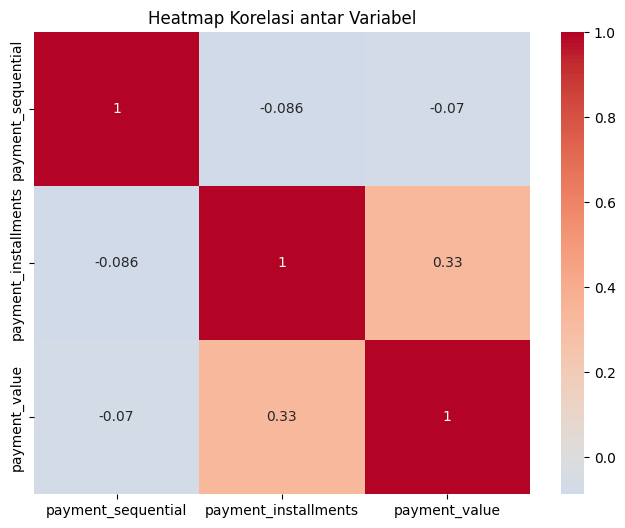

In [61]:
# Pilih kolom numerik
numeric_df = order_payment_df.select_dtypes(include=['float64', 'int64'])

# Hitung korelasi antar variabel
corr_matrix = numeric_df.corr()

# Tampilkan heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Heatmap Korelasi antar Variabel")
plt.show()

**Insight**:

Heatmap korelasi di atas memberikan beberapa pemahaman berikut:
1. pada variabel payment_sequential dan payment_value menunjukkan angka korelasi negatif yaitu -0.07 yang artinya terdapat hubungan antar dua variabel yang bergerak berlawanan. Dalam hal ini jika variabel payment_sequential naik maka variabel payment_value akan turun begitu sebaliknya.
2. pada variabel payment_installments dan payment_value menunjukkan angka korelasi positif yaitu  0.33 yang artinya terdapat hubungan antar dua variabel yang bergerak ke arah yang sama. Dalam hal ini jika variabel payment_installments naik maka variabel payment_value juga naik.

array([[<Axes: title={'center': 'payment_sequential'}>,
        <Axes: title={'center': 'payment_installments'}>],
       [<Axes: title={'center': 'payment_value'}>, <Axes: >]],
      dtype=object)

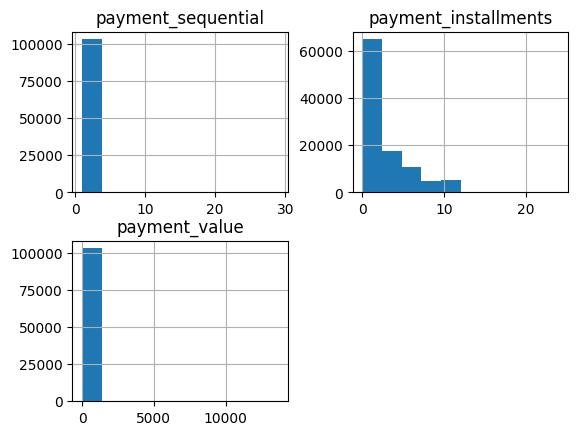

In [94]:
order_payment_df.hist()

**Insight**:

Histogram di atas menunjukkan bahwa variabel payment_installments cenderung terdistribusi ke kanan (right skewed) yang artinya mean > median & modus.

### EDA Table `order_reviews_df`

In [63]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Unknown,Unknown,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Unknown,Unknown,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Unknown,Unknown,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Unknown,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Unknown,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [64]:
order_reviews_df['review_score'].value_counts()

review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64

Dari tabel di atas diketahui jumlah review berdasarkan score review-nya

### EDA Table `orders_df`

In [65]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### EDA Table `product_cat_df`

In [66]:
product_cat_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### EDA Table `products_df`

In [67]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [68]:
products_df['product_category_name'].value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 74, dtype: int64

In [69]:
products_df.describe()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.0,32951,32951.0,32951.0,32951.0,32951.0,32951.0
unique,32951,74,67.0,2961,20.0,2205.0,100.0,103.0,96.0
top,106392145fca363410d287a815be6de4,cama_mesa_banho,60.0,NoName,1.0,200.0,16.0,10.0,11.0
freq,1,3029,2182.0,610,16489.0,2084.0,5520.0,2548.0,3718.0


Dari tabel di atas diketahui bahwa persediaan produk yang berada pada posisi paling atas adalah cama_mesa_banho (bed_bath_table)

### EDA Table `sellers_df`

In [70]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [71]:
sellers_df['seller_city'].value_counts()

seller_city
sao paulo                                 694
curitiba                                  127
rio de janeiro                             96
belo horizonte                             68
ribeirao preto                             52
                                         ... 
ipua                                        1
muqui                                       1
timoteo                                     1
pouso alegre                                1
rio de janeiro, rio de janeiro, brasil      1
Name: count, Length: 611, dtype: int64

Dari tabel di atas diketahui bahwa sellers paling terbanyak berasal dari kota Sao Paulo dengan jumlah 694 sellers

## Visualization & Explanatory Analysis

### Pertanyaan 1: **State mana yang paling banyak menyumbang customer? dan Customer dari kota & state (negara bagian) mana yang paling sering menggunakan metode pembayaran credit card?**

#### Merge Tabel `customers_df`, `orders_df`, `order_payment_df`

In [72]:
all_df = pd.merge(
    left=order_items_df,
    right=order_payment_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df = pd.merge(
    left=all_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
all_df = pd.merge(
    left=all_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
all_df = pd.merge(
    left=all_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df = pd.merge(
    left=all_df,
    right=orders_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df = pd.merge(
    left=all_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

print("Data setelah merge keseluruhan:")
print(all_df.head())


Data setelah merge keseluruhan:
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  payment_sequential  \
0  2017-09-19 09:45:35   58.90          13.29                 1.0   
1  2017-05-03 11:05:13  239.90          19.93                 1.0 

In [73]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118310 entries, 0 to 118309
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118310 non-null  object 
 1   order_item_id                  118310 non-null  int64  
 2   product_id                     118310 non-null  object 
 3   seller_id                      118310 non-null  object 
 4   shipping_limit_date            118310 non-null  object 
 5   price                          118310 non-null  float64
 6   freight_value                  118310 non-null  float64
 7   payment_sequential             118307 non-null  float64
 8   payment_type                   118307 non-null  object 
 9   payment_installments           118307 non-null  float64
 10  payment_value                  118307 non-null  float64
 11  product_category_name          118310 non-null  object 
 12  product_name_lenght           

In [74]:
all_df.to_csv("all_data.csv.gz", compression="gzip", index=False)

C:\Users\62852\AppData\Local\Temp\ipykernel_21604\2334870026.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\62852\AppData\Local\Temp\ipykernel_21604\2334870026.py:8: UserWarning: 
The palette list has fewer values (8) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


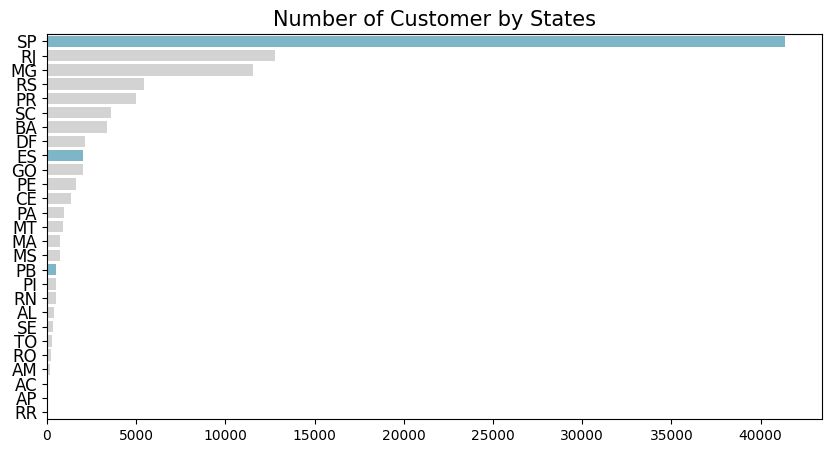

In [75]:
bystate_df = all_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count",
    y="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

**Insight:**

Berdasarkan visualisasi data tersebut, diketahui bahwa pelanggan yang kita miliki paling banyak berasal dari negara bagian SP (São Paulo)

In [76]:
all_df.groupby(by=["customer_city", "payment_type"]).agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,,order_id,payment_value
customer_city,payment_type,,
sao paulo,credit_card,12098,2230147.70
rio de janeiro,credit_card,5473,1247615.60
sao paulo,boleto,2754,540080.97
belo horizonte,credit_card,2214,406238.90
brasilia,credit_card,1680,351897.78
...,...,...,...
caratinga,voucher,1,1.78
iguape,voucher,1,1.65
santo anastacio,voucher,1,1.29


**Insight:**
Dari tabel di atas kita bisa tahu beberapa hal berikut:
- customer dari kota Sao Paulo paling sering melakukan metode pembayaran menggunakan credit card dengan nilai pembayaran senilai 2230147.70
- pada urutan kedua, kota yang paling sering menggunakan credit card adalah kota Rio De Janeiro dengan nilai pembayaran senilai 1247615.60

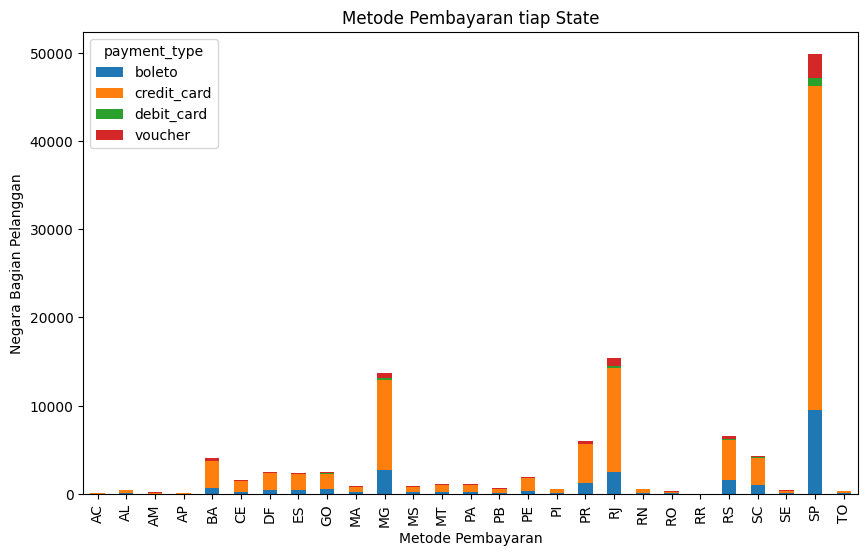

In [77]:
# Distribusi negara bagian dengan jenis-jenis metode pembayaran
state_payment = all_df.groupby(['customer_state','payment_type']).size().unstack(fill_value=0)

state_payment.plot(kind='bar', stacked=True, figsize=(10, 6), title='Metode Pembayaran tiap State')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Negara Bagian Pelanggan')
plt.show()

Dari stacked bar chart, diketahui bahwa negara bagian SP (Sao Paulo) adalah negara yang paling banyak melakukan transaksi dengan metode pembayaran credit_card

### Pertanyaan 2: **Dalam periode satu tahun, pada bulan berapakah transaksi paling banyak dilakukan dan metode pembayaran apa yang paling sering dilakukan selama periode 1 tahun (12 bulan)?**


* **Analisis Metode Pembayaran**

<Axes: title={'center': 'Distribusi Transaksi per Bulan'}, xlabel='month'>

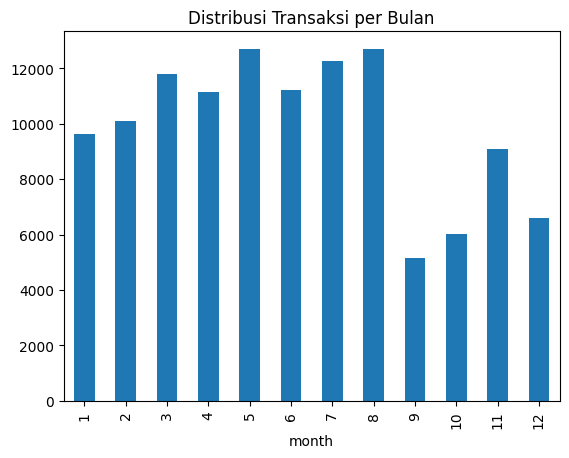

In [78]:
# Mengonversi kolom tanggal menjadi datetime
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

# Menambahkan kolom tambahan (tahun, bulan, hari, jam)
all_df['year'] = all_df['order_purchase_timestamp'].dt.year
all_df['month'] = all_df['order_purchase_timestamp'].dt.month
all_df['day'] = all_df['order_purchase_timestamp'].dt.day
all_df['hour'] = all_df['order_purchase_timestamp'].dt.hour
all_df['weekday'] = all_df['order_purchase_timestamp'].dt.weekday
# Melihat distribusi transaksi per bulan
monthly_transactions = all_df.groupby('month').size()
monthly_transactions.plot(kind='bar', title='Distribusi Transaksi per Bulan')

Dari diagram batang di atas diketahui bahwa transaksi paling banyak dilakukan pada bulan 5 & 8 dan transaksi paling sedikit dilakukan pada bulan 9

* **Analisis Metode Pembayaran**



In [79]:
all_df['payment_type'].value_counts()

payment_type
credit_card    87258
boleto         23018
voucher         6332
debit_card      1699
Name: count, dtype: int64

Tabel di atas menunjukkan jumlah transaksi dengan 5 jenis metode pembayaran, dan credit_card adalah metode yang paling sering digunakan dengan detail total 87258

<Axes: title={'center': 'Metode Pembayaran per Bulan'}, xlabel='payment_type'>

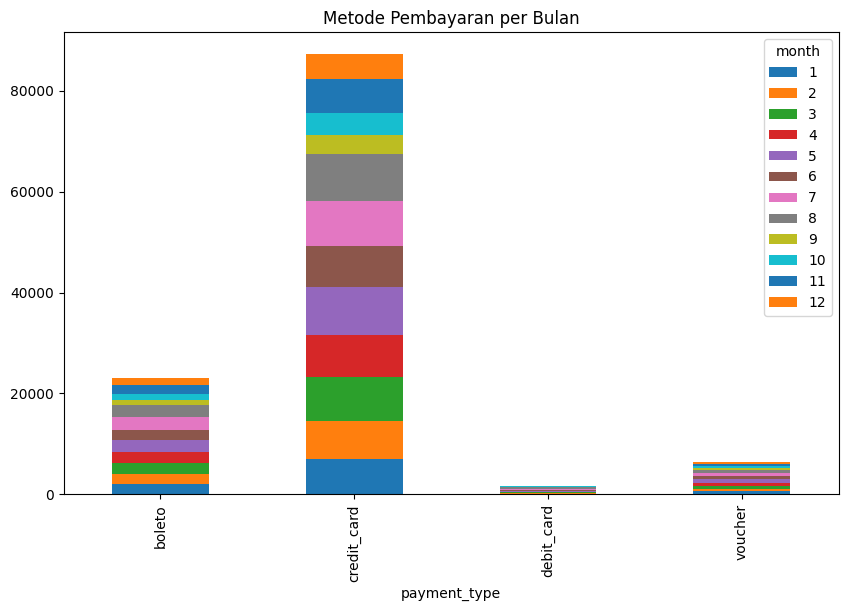

In [80]:
# Distribusi metode pembayaran
payment_distribution = all_df.groupby(['payment_type', 'month']).size().unstack()
payment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), title='Metode Pembayaran per Bulan')


Dari stacked bar chart di atas diketahui bahwa metode pembayaran credit_card adalah metode yang paling sering dilakukan selama periode waktu satu tahun (12 bulan)

### Pertanyaan 3: **Pada hari dan waktu (siang/sore/malam) customer paling sering melakukan transaksi dan metode pembayaran apa yang paling sering digunakan customer pada waktu tersebut?**

* **Pola Transaksi Harian**

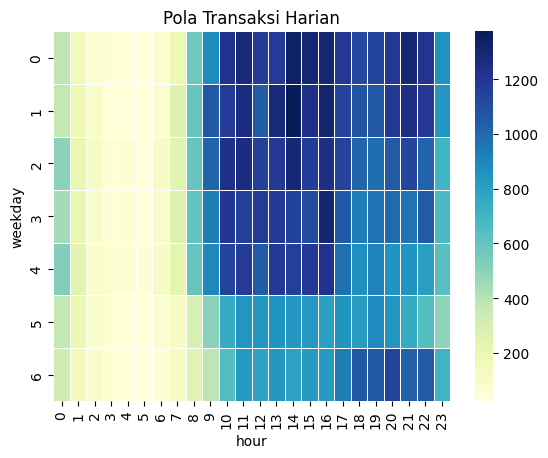

In [81]:
# Heatmap untuk pola transaksi harian
heatmap_data = all_df.groupby(['weekday', 'hour']).size().unstack()
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5)
plt.title('Pola Transaksi Harian')
plt.show()

**Insight:**

Pada heatmap di atas, pola transaksi harian paling banyak dilakukan pada hari dan waktu tertentu. berikut untuk hari dan waktu yang paling banyak melakukan transaksi:
* pada hari hari senin di jam 2 & 4 siang, dan jam 9 malam.
* pada hari selasa transaksi lumayan sering dilakukan pada jam 2 siang
* pada hari Rabu transaksi dilakukan paling banyak pada jam 4 sore.
* pada hari Kamis transaksi paling banyak dilakukan pada jam 4 siang.
* pada hari sabtu transaksi lumayan sering dilakukan pada jam 8 malam.
* pada hari minggu transaksi banyak dilakukan pada jam 10 & 11 pagi, jam 2-5 sore, dan jam 9 malam.

* **Distribusi metode pembayaran berdasarkan waktu (jam atau hari)**

In [82]:
# Distribusi metode pembayaran per jam
hourly_payment = all_df.groupby(['hour', 'payment_type']).size().unstack(fill_value=0)


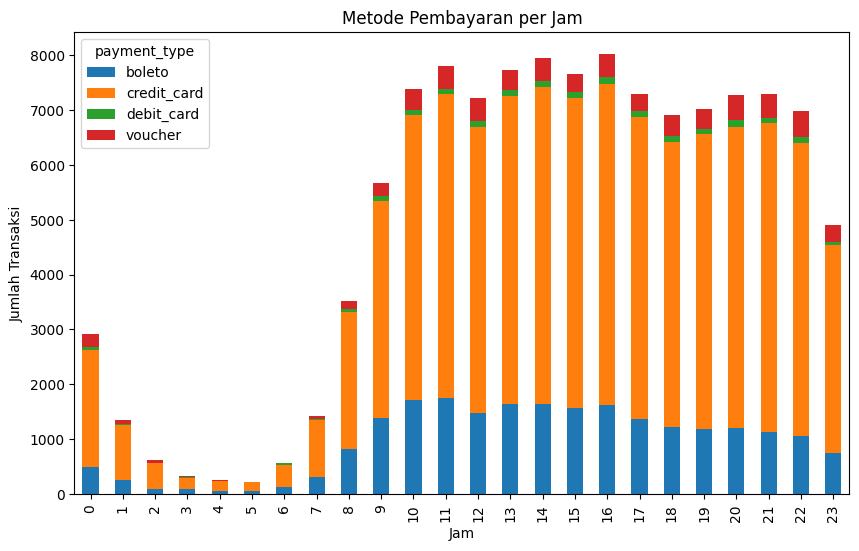

In [83]:
hourly_payment.plot(kind='bar', stacked=True, figsize=(10, 6), title='Metode Pembayaran per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Transaksi')
plt.show()

**Insight:**

Dari stacked bar di atas diketahui bahwa metode pembayaran credit_card adalah metode pembayaran paling sering dilakukan pada rentang waktu mulai dari jam 9 pagi hingga jam 11 malam

### Pertanyaan 4: **Seller dari kota apa yang paling banyak menjual kategori produk tersebut?**

#### Merge Tabel `order_items_df`, `order_payment_df`, `product_df`, `sellers_df`

In [84]:
all_df.groupby(by=["seller_city", "product_category_name"]).agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

order_id  \
seller_city                     product_category_name                         
ibitinga                        cama_mesa_banho                        5179   
sao paulo                       moveis_decoracao                       2071   
itaquaquecetuba                 moveis_escritorio                      1010   
sao paulo                       cool_stuff                             1906   
                                utilidades_domesticas                  1514   
...                                                                     ...   
rio de janeiro / rio de janeiro telefonia                                 1   
curitiba                        alimentos_bebidas                         1   
sao jose dos campos             sinalizacao_e_seguranca                   1   
fernando prestes                NoName                                    1   
araraquara                      construcao_ferramentas_construcao         1   

                                                                   payment_value  
seller_city                     product_category_name                             
ibitinga                        cama_mesa_banho                        860006.73  
sao paulo                       moveis_decoracao                       560116.45  
itaquaquecetuba                 moveis_escritorio                      518843.02  
sao paulo                       cool_stuff                             349372.40  
                                utilidades_domesticas                  335585.35  
...                                                                          ...  
rio de janeiro / rio de janeiro telefonia                                  22.54  
curitiba                        alimentos_bebidas                          22.52  
sao jose dos campos             sinalizacao_e_seguranca                    21.75  
fernando prestes                NoName                                     19.59  
araraquara                      construcao_ferramentas_construcao          16.78  

[3314 rows x 2 columns]

Dari tabel di atas diketahui bahwa kategori produk **cama_mesa_banho (bed_bath_table**) atau **meja tempat tidur mandi** adalah **produk yang paling banyak di-order** oleh customer dari seller yang berasal dari kota **ibitinga** dengan jumlah nilai pembayaran tertinggi

### Pertanyaan 5: **Jika dilihat berdasarkan review, produk apa yang paling laris terjual?**

In [85]:
all_df.groupby(by=['product_category_name', 'review_score']).agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,,order_id,payment_value
product_category_name,review_score,,
beleza_saude,5.0,5398,1001082.89
cama_mesa_banho,5.0,4980,843749.19
relogios_presentes,5.0,3197,799401.49
esporte_lazer,5.0,4646,774574.02
informatica_acessorios,5.0,3703,749685.46
...,...,...,...
fashion_roupa_infanto_juvenil,1.0,1,66.69
cds_dvds_musicais,3.0,1,61.11
construcao_ferramentas_ferramentas,3.0,1,43.98


**Insight:**
Dari tabel di atas diketahui bahwa kategori produk yang paling laris adalah beleza_saude (health beauty) dengan review score 5 dan memberikan nilai pembayaran (payment_value) terbesar.

### Pertanyaan 6:
- **Kapan terakhir kali pelanggan melakukan transaksi?**
- **Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?**
- **Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?**

* Menggunakan Teknik RFM (Recency, Frequency, dan Monetary)


In [86]:
# Mengubah nilai unik order_id menjadi angka urut
all_df['customer_id'] = pd.factorize(all_df['customer_id'])[0]

# Lanjutkan proses grupby seperti biasa
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",  # mengambil tanggal order terakhir
    "order_id": "nunique",  # menghitung jumlah order
    "payment_value": "sum"  # menghitung jumlah revenue yang dihasilkan
})

rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# Menghitung recency
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

# Menghapus kolom max_order_timestamp
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()


,customer_id,frequency,monetary,recency
0,0,1,72.19,355
1,1,1,259.83,495
2,2,1,216.87,232
3,3,1,25.78,26
4,4,1,218.04,576


C:\Users\62852\AppData\Local\Temp\ipykernel_21604\4286489001.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\62852\AppData\Local\Temp\ipykernel_21604\4286489001.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\62852\AppData\Local\Temp\ipykernel_21604\4286489001.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False`

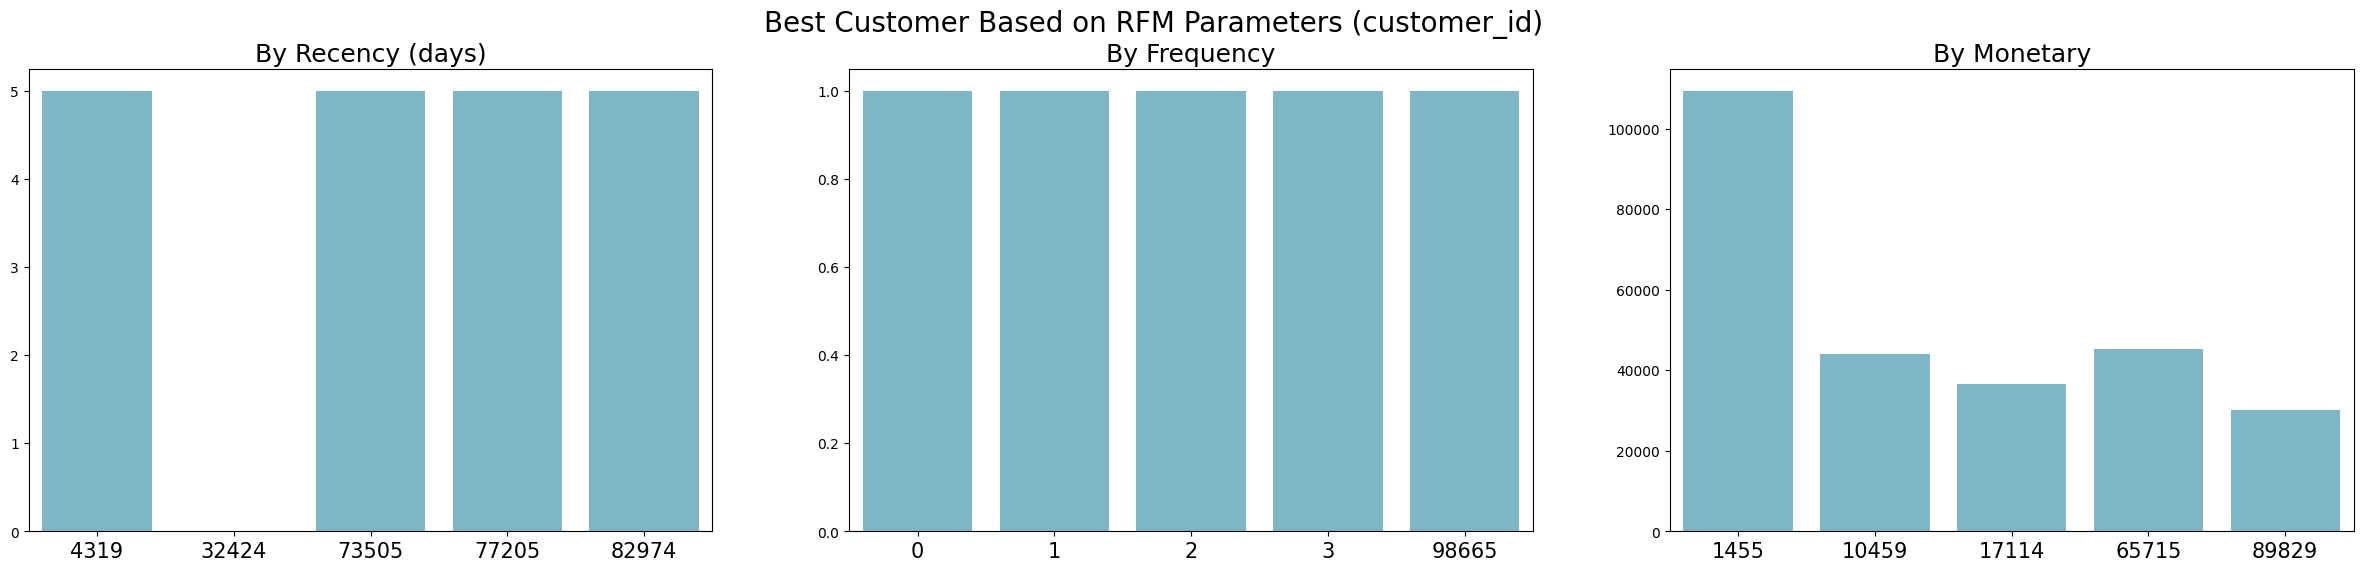

In [87]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

**Insight:**
- Pada bar chart (Recency) menunjukkan jumlah hari sejak terakhir kali customer melakukan transaksi. pada chart tersebut terdapat paling banyak 82974 customer yang melakukan transaksi terakhir kali pada 18 hari yang lalu.
- Pada bar chart (Frequency) menunjukkan jumlah total transaksi yang dilakukan oleh customer. pada chart tersebut diketahui bahwa sejumlah customer rata-rata melakukan transaksi pemesanan sebanyak satu kali.
- Pada bar chart (Monetary) menunjukkan total pembayaran yang dilakukan customer. pada chart tersebut menunjukkan ada 1455 customer yang mengeluarkan uang hingga 110.000 BRL

### Pertanyaan 7: **Bagaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Bulan Terakhir? (Tahun 2018)?**

C:\Users\62852\AppData\Local\Temp\ipykernel_21604\2047020134.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({


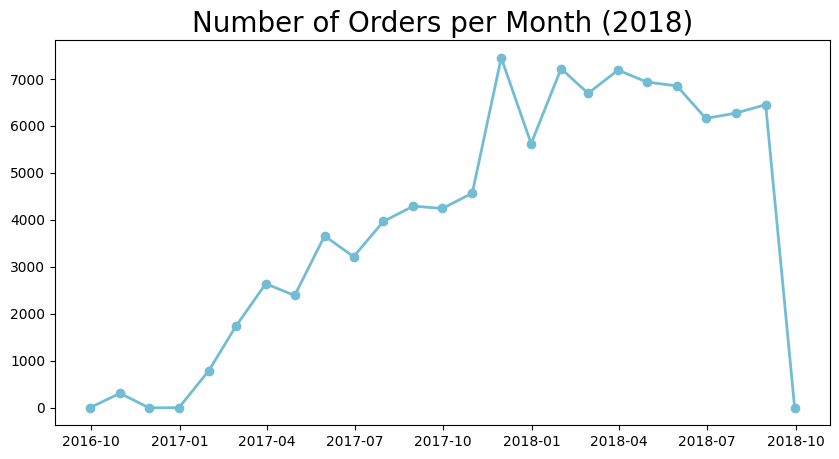

In [88]:
monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_purchase_timestamp"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Insight:**

Dari line chart di atas menunjukkan fluktuasi pada jumlah pesanan dimana terjadi kenaikan pesanan yang tinggi pada bulan Desember 2017 dan terjadi penurunan pesanan drastis pada bulan Oktober 2018

## Analisis Lanjutan (Melihat Persebaran Customer dari Berbagai Wilayah)

### Merge Tabel `geolocation_df`, `customers_df`, `orders_df`, `order_payment_df`, dan `order_items_df`

In [89]:
geolocation_df = pd.read_csv('E-Commerce Public Dataset\geolocation_dataset.csv')
all_df1 = pd.merge(
    left=customers_df,
    right=geolocation_df,
    how="inner",
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)
all_df1 = pd.merge(
    left=all_df1,
    right=orders_df,
    how="inner",
    left_on="customer_id",
    right_on="customer_id"
)
all_df1 = pd.merge(
    left=all_df1,
    right=order_payment_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)
all_df1 = pd.merge(
    left=all_df1,
    right=order_items_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)
all_df1.head()

<>:1: SyntaxWarning: invalid escape sequence '\g'
<>:1: SyntaxWarning: invalid escape sequence '\g'
C:\Users\62852\AppData\Local\Temp\ipykernel_21604\2742265850.py:1: SyntaxWarning: invalid escape sequence '\g'
  geolocation_df = pd.read_csv('E-Commerce Public Dataset\geolocation_dataset.csv')


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,...,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP,...,1,credit_card,2,146.87,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.497396,-47.399241,franca,SP,...,1,credit_card,2,146.87,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.510459,-47.399553,franca,SP,...,1,credit_card,2,146.87,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.480940,-47.394161,franca,SP,...,1,credit_card,2,146.87,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.515413,-47.398194,franca,SP,...,1,credit_card,2,146.87,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88


In [90]:
all_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954162 entries, 0 to 17954161
Data columns (total 27 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   customer_id                    object 
 1   customer_unique_id             object 
 2   customer_zip_code_prefix       int64  
 3   customer_city                  object 
 4   customer_state                 object 
 5   geolocation_zip_code_prefix    int64  
 6   geolocation_lat                float64
 7   geolocation_lng                float64
 8   geolocation_city               object 
 9   geolocation_state              object 
 10  order_id                       object 
 11  order_status                   object 
 12  order_purchase_timestamp       object 
 13  order_approved_at              object 
 14  order_delivered_carrier_date   object 
 15  order_delivered_customer_date  object 
 16  order_estimated_delivery_date  object 
 17  payment_sequential             int64  
 18  

Hasil merge 3 tabel di atas digunakan agar mempermudah untuk melakukan analisis menggunakan plot data geospasial

In [91]:
# Membuat kolom geometry menggunakan koordinat
geometry = [Point(xy) for xy in zip(all_df1['geolocation_lng'], all_df1['geolocation_lat'])]

# Membuat GeoDataFrame
geo_data = gpd.GeoDataFrame(all_df1, geometry=geometry, crs="EPSG:4326")

# Tampilkan beberapa baris data
print(geo_data.head())

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
2  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
3  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
4  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   

   customer_zip_code_prefix customer_city customer_state  \
0                     14409        franca             SP   
1                     14409        franca             SP   
2                     14409        franca             SP   
3                     14409        franca             SP   
4                     14409        franca             SP   

   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                        14409       -20.509897       -47.397866   
1                        14409       -20.497396       -47.399241

In [92]:
# Total transaksi per wilayah
regional_summary = geo_data.groupby('customer_state')['payment_value'].agg(['sum', 'mean', 'count'])
print(regional_summary)

                         sum        mean    count
customer_state                                   
AC              2.180282e+06  251.011035     8686
AL              9.101950e+06  242.382555    37552
AM              1.385037e+06  215.402406     6430
AP              1.476873e+06  259.191541     5698
BA              9.637651e+07  218.101165   441889
CE              1.652800e+07  221.240593    74706
DF              1.869953e+07  172.590830   108346
ES              6.892235e+07  188.327866   365970
GO              3.413315e+07  213.293516   160029
MA              1.557810e+07  255.157041    61053
MG              5.948645e+08  174.214570  3414551
MS              1.410676e+07  194.019316    72708
MT              3.903941e+07  252.018387   154907
PA              2.290167e+07  238.720668    95935
PB              1.014650e+07  304.160758    33359
PE              2.660101e+07  202.450677   131395
PI              7.593798e+06  274.530847    27661
PR              1.344000e+08  181.034257   742401


Dari output di atas diketahui bahwa pelanggan dari negara bagian (customer state) dengan total transaksi terbanyak adalah Paraíba (PB) dengan rata-rata 304.160758 dan negara bagian yang dengan total transaksi paling sedikit adalah Sao Paulo (SP) dengan rata-rata 155.031764. Akan tetapi, Sao Paulo adalah negara bagian yang paling banyak melakukan transaksi yaitu sebanyak 6701092 transaksi

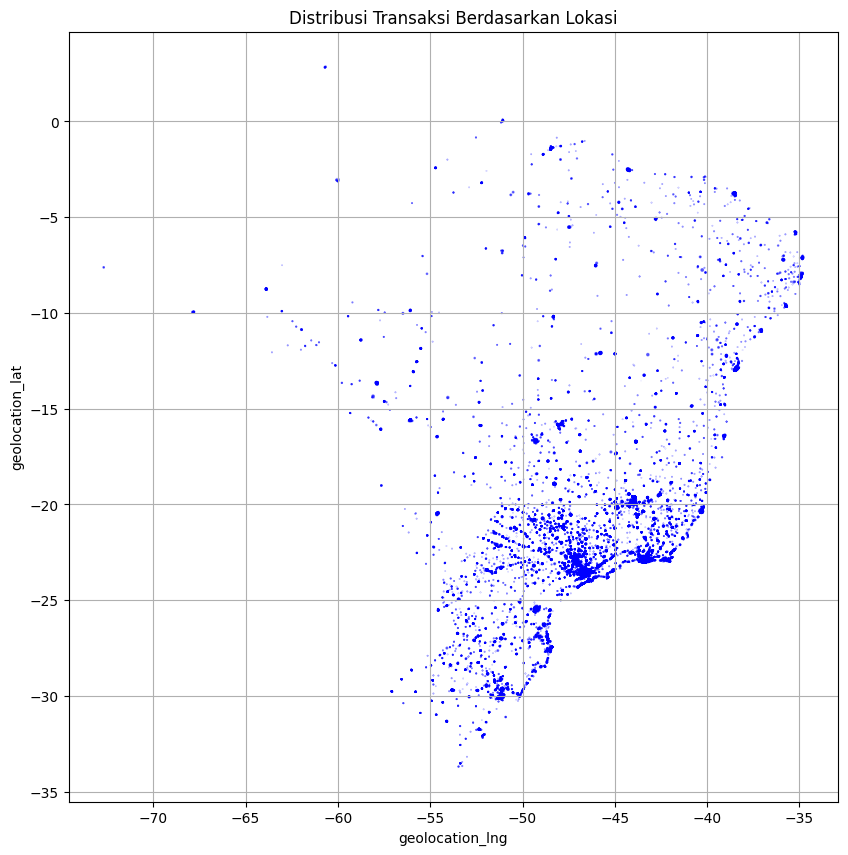

In [93]:
# Plot data geospasial (titik transaksi)
# Sample a subset of the data to avoid memory errors
sampled_geo_data = geo_data.sample(n=100000, random_state=1)

fig, ax = plt.subplots(figsize=(10, 10))
sampled_geo_data.plot(ax=ax, color='blue', alpha=0.5, markersize=sampled_geo_data['payment_value'] / 1000)
plt.title('Distribusi Transaksi Berdasarkan Lokasi')
plt.xlabel('geolocation_lng')
plt.ylabel('geolocation_lat')
plt.grid(True)
plt.show()

Dari plot distribusi di atas, dapat dilihat wilayah dari customer yang melakukan transaksi, semakin rapat dan terang warna pada plot maka menentukan seberapa banyak pengeluaran transaksi yang dilakukan di wilayah tersebut.

## Conclusion

**1. Conclussion pertanyaan 1:**
- Kita jadi mengetahui negara bagian (state) penyumbang customer terbanyak yaitu di Sao Paulo
- Customer dari Sau Paulo juga paling sering menggunakan metode pembayaran menggunakan kartu kredit

**2. Conclussion pertanyaan 2:**
- Diketahui bahwa transaksi paling banyak terjadi pada bulan Mei & Agustus, dan paling sedikit pada bulan September dengan metode pembayaran yang paling sering dilakukan adalah menggunakan kartu kredit selama periode 12 bulan

**3. Conclussion pertanyaan 3:**
- Dapat diketahui juga pola transaksi harian yang dilihat berdasarkan hari dan waktu (siang/sore/malam) yang menunjukkan kapan customer sering melakukan transaksi
- Diketahui juga distribusi metode pembayaran berdasarkan jam dan diketahui bahwa metode pembayaran dengan menggunakan kartu kredit sering digunakan pada range jam 9 pagi gingga jam 11 malam.

**4. Conclussion pertanyaan 4:**
- Diketahui bahwa kategori produk **cama_mesa_banho (bed_bath_table**) atau **meja tempat tidur mandi** adalah **produk yang paling banyak di-order** oleh customer dari seller (penjual) yang berasal dari kota **Ibitinga** dengan jumlah nilai pembayaran tertinggi

**5. Conclussion pertanyaan 5:**
Diketahui bahwa kategori produk yang paling laris berdasarkan review score adalah Beleza Saude (Health Beauty) dengan score 5

**6. Conclussion pertanyaan 6:**
- Diketahui bahwa customer sudah tidak melakukan transaksi lagi sejak 18 hari yang lalu
- Diketahui bahwa rata-rata customer melakukan transaksi sebanyak satu kali dengan total pembayaran sejumlah 14000 BRL dari 6195 customer

**7. Conclussion pertanyaan 7:**
Terjadi fluktuasi penjualan produk dimana terdapat kenaikan pesanan yang tinggi pada bulan Desember 2017 dan terdapat penurunan pesanan secara drastis pada bulan Oktober 2018

### Tujuan Teknik Analisis yang Digunakan Pada Analisis Di Atas

Berikut adalah teknik analisis yang digunakan beserta alasan penggunaannya:

1. RFM Analisis:
  - Recency: menghitung jumlah hari sejak terakhir kali customer melakukan transaksi
  - Frequency: menghitung jumlah total transaksi yang dilakukan oleh pelanggan dalam periode tertentu
  - Monetary: menghitung total pengluaran pelanggan dalam periode tertentu
2. Geospatial Analisis: menganalisis data berdasarkan lokasi geografis untuk mengidentifikasi tren atau pola tertentu disuatu wilayah. dalam analisis ini digunakan untuk melihat intensitas seberapa sering pelanggan dari suatu wilayah melakukan transaksi